# MA3K7 Assignment 4
### Due: 6 Mar 2024

**Problem:**\
You are standing on the first step of an infinitely long numbered path as shown below.

You have a fair coin which has the number 1 written on one side and the number 2 on the other. You throw the coin, and if it comes up N, you would then take N steps to the right. 
For example, if you throw the coin and it comes up 2, you take 2 steps to the right to land on step number 3.
You now repeat the exercise, throwing the coin again and walking the number of steps that comes up on the coin. If you throw the coin 24 times, you are certain to have landed on, or past, step number 25. 

What is the probability that at some point in this exercise you will land on step number 25? 



In [1]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
## random number generator for numbers between 1 and 2

N = random.randint(1,2)
print(N)

1


In [3]:
## initiate the steps/path and add based on N
x=1

while x<=25:
#     print(x)
    N = random.randint(1,2)
#     print(N)
    x+=N


In [4]:
## method 2

x = 1
path = []
tosses = []


while x<=25:
    path.append(x)
    N = random.randint(1,2)
    tosses.append(N)
    x+=N

tosses.remove(tosses[-1]) # we don't care about the coin toss when we have passed 25

print(len(path), len(tosses))
print("Path", path)
print("Pattern of N:", tosses)

16 15
Path [1, 3, 5, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 22, 24]
Pattern of N: [2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2]


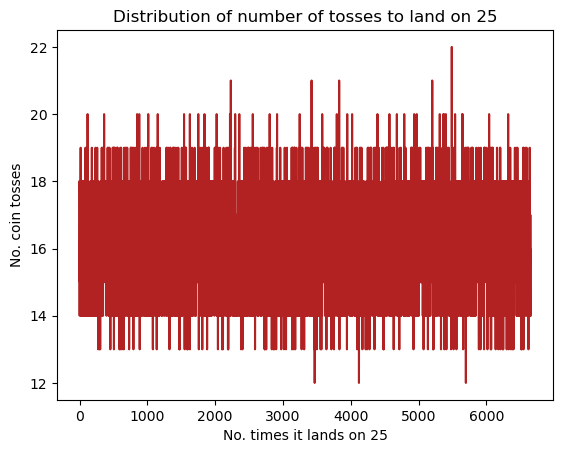

The mean number of coin tosses to land on 25: 16.116205652435358


In [5]:
## number of tosses it takes to land on 25


m=0
no_iterations2 = 10000
values_tosses = []
while m < no_iterations2:
    x = 1
    path = []
    tosses = []
    while x<=25:
        path.append(x)
        N = random.randint(1,2)
        tosses.append(N)
        x+=N

    tosses.remove(tosses[-1]) # we don't care about the coin toss when we have passed 25
    if 25 in path:
        values_tosses.append(len(tosses))
    m+=1
    
# print(len(values_tosses))

plt.plot(values_tosses, color = 'firebrick')
plt.xlabel("No. times it lands on 25")
plt.ylabel("No. coin tosses")
plt.title("Distribution of number of tosses to land on 25")
plt.show()

print("The mean number of coin tosses to land on 25: " + str(np.mean(values_tosses)))

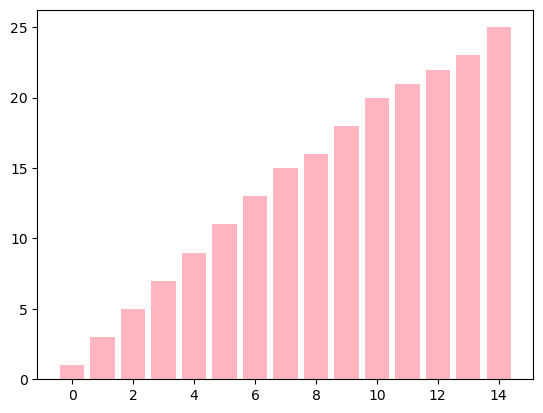

In [6]:
plt.bar(np.arange(len(path)), path, color='lightpink')
plt.show()

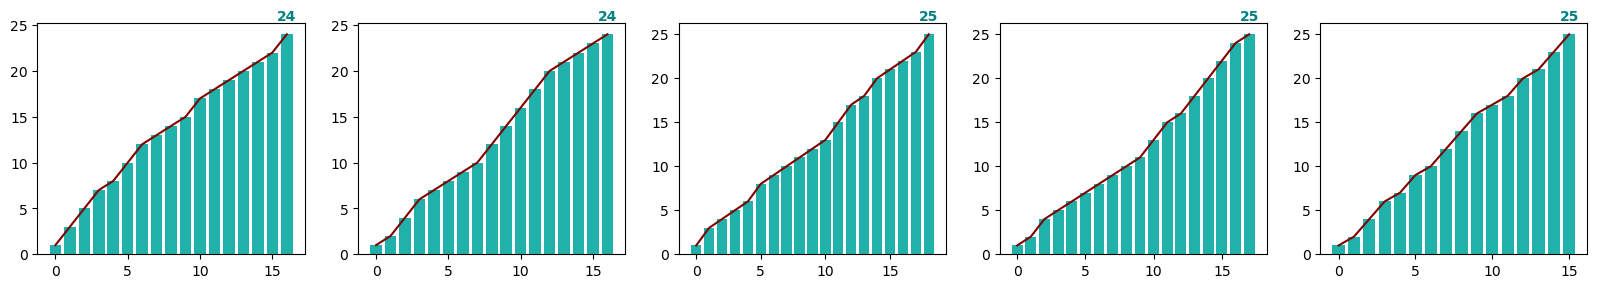

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [7]:
## method 3: adding iterations

i = 0
count_of_25 = 0
no_iterations = 5
fig, axs = plt.subplots(1, no_iterations, figsize=(4*no_iterations, 3))

while i < no_iterations:
    x = 1
    path = []
    tosses = []
    while x<=25:
        path.append(x)
        N = random.randint(1,2)
        tosses.append(N)
        x+=N
        


#     print(len(tosses))
#     print(path)
#     print(tosses[:-1]) # we don't care about the coin toss when we have passed 25
    
    fig = plt.figure(figsize = (4,4))
    x_values = np.arange(len(path))
    
    max_value = max(path)
    max_index = path.index(max_value)
    axs[i].annotate(f'{max_value}', 
             (max_index, max_value),  
             textcoords="offset points", 
             xytext=(0,10),
             ha='center',
                 color='teal', 
                 weight='bold')
    
    axs[i].bar(x_values, path, color='lightseagreen')
    axs[i].plot(x_values, path, color='maroon')

    
    if 25 in path:
        count_of_25+=1
    
    i+=1
    
plt.tight_layout()
plt.show()

No. times the player lands on '25': 8 times out of 10 games
No. times the player lands on '25': 33 times out of 50 games
No. times the player lands on '25': 64 times out of 100 games
No. times the player lands on '25': 649 times out of 1000 games
No. times the player lands on '25': 6611 times out of 10000 games
No. times the player lands on '25': 66545 times out of 100000 games
No. times the player lands on '25': 666072 times out of 1000000 games


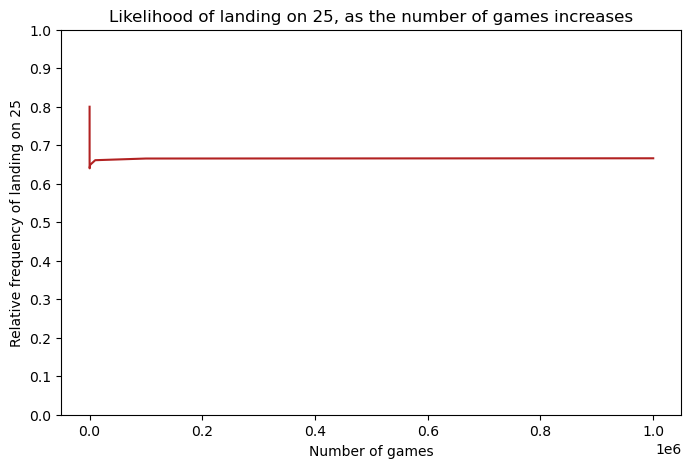

In [8]:
## method 3: adding iterations without the plots so i can change no. iterations

n = 0
i = 0
count_of_25 = 0
counts_as_n_increases = []
no_iterations = [10,50,100,1000,10000,100000,1000000]


for n in no_iterations:
    while i < n:
        x = 1
        path = []
        tosses = []
        while x<=25:
            path.append(x)
            N = random.randint(1,2)
            tosses.append(N)
            x+=N



    #     print(len(tosses))
    #     print(path)
    #     print(tosses[:-1]) # we don't care about the coin toss when we have passed 25

        if 25 in path:
            count_of_25+=1
        
        i+=1
    counts_as_n_increases.append(count_of_25)
    print("No. times the player lands on '25': " + str(count_of_25)+ " times out of " + str(n) + " games")
    n+=1
    
# print(counts_as_n_increases,no_iterations)

outcomes = []
l = 0
for l in range(len(no_iterations)):
    outcomes.append(counts_as_n_increases[l]/no_iterations[l])
    l+=1


fig = plt.figure(figsize = (8,5))
plt.plot(no_iterations, outcomes, color = 'firebrick')
plt.yticks(np.arange(0, 1.1, 0.1))  # Start, stop, step
plt.xlabel("Number of games")
plt.ylabel("Relative frequency of landing on 25")
plt.title("Likelihood of landing on 25, as the number of games increases")
plt.show()

In [10]:
total_probability = 0

for k in range(0,13):
    prob = (0.5**(24-k)) * math.comb(24-k,k)
    total_probability += prob
    
print(total_probability)

0.6666666865348816


In [11]:
from sympy import symbols, binomial, summation

k = symbols('k')
expression = 0.5**(24-k) * binomial(24-k, k)
sum_value = summation(expression, (k, 0, 12))

print(sum_value)

0.666666686534882
